**LOAN DEFAULT PREDICTION USING PYTHON**

According to the American Bankers association survey, Banks with Home equity line of credit  and Home equity loans average a 1 percent return on assets (ROA) overall, but earn 1.5 percent on their HELOCs and 1.25 percent on their HELs, which means that these two products are more profitable for banks than their average loans. But the delinquency rate on Home equity loans is higher than all other types of consumer loans. It is imperative for banks to take calculated risks in this area for financial growth.


A Bank offers a home equity line of credit to its clients. As per the dataset, many of these accepted applicants (approximately 20%) have defaulted on their loans. By using geographic, demographic, and financial variables, the bank wants to build a model to predict whether an applicant will default.


The bank can apply the model to new loan applicants to filter applications. The accepted applicants will then be evaluated based on financial capacity to estimate the amount of loan that can be provided to prevent default.

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dataset=pd.read_csv(filepath, header =,names=, na_values= , parse_dates=[[0,1,2]]) 

df=pd.read_csv('C:/Users/velth/Desktop/Springboard/datasets/hmeq.csv')
#print(df)

#inital review of data with info() and head () methods

df.info()
#print (type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Frequency counts on categorical columns JOB and REASON to view different job types  

print(df.JOB.value_counts(dropna=False))
print(df.REASON.value_counts(dropna=False))

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64
DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


 **CONVERTING DATA TYPES of ATTRIBUTES**


In [6]:

# Converting object type to category for columns 'REASON' and 'JOB' and 'BAD'

df['JOB'] =df['JOB'].astype('category')
df['REASON']=df['REASON'].astype('category')
df['BAD']=df['BAD'].astype('category')

# Imputing values of the columns before converting to int from float

df.YOJ= df.YOJ.fillna(df.YOJ.mean())
df.CLAGE=df.CLAGE.fillna(df.CLAGE.mean())
df.CLNO =df.CLNO.fillna(df.CLNO.mean())

# Converting data type of columns from Float to Integer

df.YOJ= df.YOJ.astype(int)
df.CLNO =df.CLNO.astype(int)
df.CLAGE=df.CLAGE.astype(int)

# df['CLAGE']=pd.to_numeric(df['CLAGE'],errors='ignore',downcast='signed')

df.info() # Shows the columns coverted to INT 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null category
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null category
JOB        5681 non-null category
YOJ        5960 non-null int32
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5960 non-null int32
NINQ       5450 non-null float64
CLNO       5960 non-null int32
DEBTINC    4693 non-null float64
dtypes: category(3), float64(6), int32(3), int64(1)
memory usage: 413.8 KB


In [7]:
# Removing any duplicate values in the data if existed 

df=df.drop_duplicates()

# There were no duplicate values in the data


**HANDLING MISSING VALUES**


In [8]:
# Getting the count of the missing values

df_missing=df.dropna()
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3585 non-null category
LOAN       3585 non-null int64
MORTDUE    3585 non-null float64
VALUE      3585 non-null float64
REASON     3585 non-null category
JOB        3585 non-null category
YOJ        3585 non-null int32
DEROG      3585 non-null float64
DELINQ     3585 non-null float64
CLAGE      3585 non-null int32
NINQ       3585 non-null float64
CLNO       3585 non-null int32
DEBTINC    3585 non-null float64
dtypes: category(3), float64(6), int32(3), int64(1)
memory usage: 277.0 KB


 Almost 40 % of the data wil be lost if we drop all the missing values 


In [9]:

# Most common category is replaced for missing values of categorical columns

df.JOB=df.JOB.fillna('Other')
df.REASON=df.REASON.fillna('DebtCon')

# Mean of the values are filled for missing values of other columns

df.MORTDUE=df.MORTDUE.fillna(df.MORTDUE.mean())
df.VALUE=df.VALUE.fillna(df.VALUE.mean())
df.DEBTINC =df.DEBTINC.fillna(df.DEBTINC.mean())

df.DEROG.value_counts() # since 76% of the values are 0 , it will be imputed for NA 
df.DEROG=df.DEROG.fillna(0)

df.DELINQ.value_counts() # since 70% of values are 0,it will be imputed for NA 
df.DELINQ=df.DELINQ.fillna(0)

df.NINQ.value_counts(dropna=False) # since 42% of values are 0,it will be imputed for NA 

df.NINQ=df.NINQ.fillna(0)

df.isnull().sum() # Verified that there are no null values


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

**IDENTIFYING  OUTLIERS**


count    5960.000000
mean      179.257215
std        83.561627
min         0.000000
25%       117.000000
50%       178.000000
75%       227.000000
max      1168.000000
Name: CLAGE, dtype: float64
count    5960.000000
mean        8.825503
std         7.254797
min         0.000000
25%         3.000000
50%         8.000000
75%        12.000000
max        41.000000
Name: YOJ, dtype: float64
count      5960.000000
mean     101776.048741
std       56843.931566
min        8000.000000
25%       66489.500000
50%       90000.000000
75%      119004.750000
max      855909.000000
Name: VALUE, dtype: float64
count    5960.000000
mean       33.779915
std         7.632713
min         0.524499
25%        30.763159
50%        33.779915
75%        37.949892
max       203.312149
Name: DEBTINC, dtype: float64


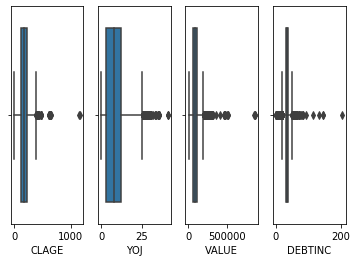

In [10]:

# Reviewing columns to find outliers  , CLNO: Number of credit lines

#print (df.CLNO.describe())  
#print (df.LOAN.describe())

# BOX PLOTS TO FIND OUTLIERS

f, axes = plt.subplots(1, 4)
import seaborn as sns
sns.boxplot(x=df.CLAGE, ax=axes[0])
sns.boxplot(x=df.YOJ, ax=axes[1])
sns.boxplot(x=df.VALUE, ax=axes[2])
sns.boxplot(x=df.DEBTINC,ax=axes[3])

print (df.CLAGE.describe())

# We found the outlier value 1168 months( or 97 years) which is logically incorrect for the age of oldest credit line.


print(df.YOJ.describe())

# Though value 41 looks as outlier, the value is logical and hence will not be removed from data

print (df.VALUE.describe())

# Again 855909 is logical and  hence will not be removed from data

print (df.DEBTINC.describe())

# The value 203 is defintely an incorrect value for the DEBTINC(debt to income ratio )



**HANDLING OUTLIERS**

In [11]:
# Removing the outliers

df.loc[df['DEBTINC']== 203.312149]
df.loc[df['CLAGE']==1168.000000]

# Delete these rows from dataFrame


CLAGE_index = df[ df['CLAGE']==1168.000000 ].index
df.drop(CLAGE_index , inplace=True)


DEBTINC_index=df[df['DEBTINC']==203.312149].index
df.drop(DEBTINC_index , inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5959 non-null category
LOAN       5959 non-null int64
MORTDUE    5959 non-null float64
VALUE      5959 non-null float64
REASON     5959 non-null category
JOB        5959 non-null category
YOJ        5959 non-null int32
DEROG      5959 non-null float64
DELINQ     5959 non-null float64
CLAGE      5959 non-null int32
NINQ       5959 non-null float64
CLNO       5959 non-null int32
DEBTINC    5959 non-null float64
dtypes: category(3), float64(6), int32(3), int64(1)
memory usage: 460.1 KB


#   Data storytelling 


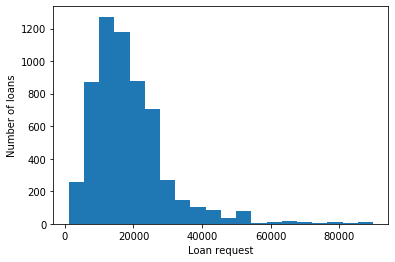

In [12]:

#Histogram for LOANS,DEBTINC,CLNO

plt.hist(df.LOAN.dropna(),bins=20)
plt.xlabel('Loan request')
plt.ylabel('Number of loans')

plt.show()

#Inference: Most of the loans were provided less than or equalto 20,000 and very less requests for laons more than 50,000


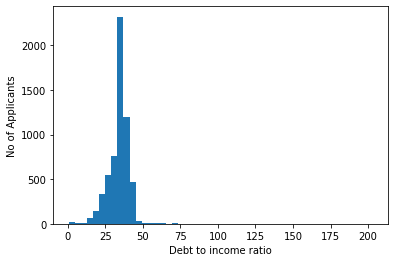

In [13]:
plt.hist(df.DEBTINC.dropna(),bins=50)

plt.xlabel('Debt to income ratio')
plt.ylabel('No of Applicants')

plt.show()

# As per the consumer financial protection bureau , the debt to income ratio ideally should be less than 43 for a good applicant.
# We can infer that most of the applicants here fall within the criteria and are less than 43%


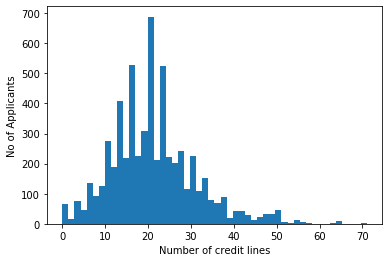

In [14]:
plt.hist(df.CLNO.dropna(),bins=50)

plt.xlabel('Number of credit lines')
plt.ylabel('No of Applicants')

plt.show()

# Most of the applicants have less than or equal to 20 credit lines.

**BI VARIATE VISUALIZATION**


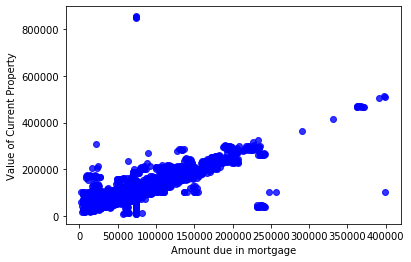

In [15]:

# Scatter Plot 

plt.scatter(df.MORTDUE,df.VALUE,c="Blue",alpha=0.8)
plt.xlabel('Amount due in mortgage')
plt.ylabel('Value of Current Property')

plt.show()

Inferences from the plot,we can clearly identify a potential BAD LOAN  by following reason 

1. In the bottom right corner, the amount due is GREATER THAN value of property which indicates applicant has more probablity to become delinquent. 


2. Whereas, at top of the curve ,applicants have high value of current property and less amount due in mortage which indicates they have less probability to become delinquent.


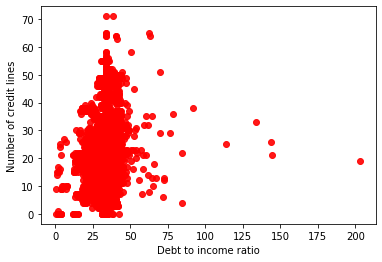

In [16]:
plt.scatter(df.DEBTINC,df.CLNO,c="Red",alpha=0.9)
plt.ylabel('Number of credit lines')
plt.xlabel('Debt to income ratio')

plt.show()


From this plot, we can infer that applicants who have more credit lines (more than 40) are having less than 43(favorable)
in ratio.


**Co-relation between the variables**


In [17]:

subset=df[['CLNO','DEBTINC','YOJ','DELINQ','DEROG','MORTDUE','LOAN','CLAGE','NINQ']]

subset.corr() 

,CLNO,DEBTINC,YOJ,DELINQ,DEROG,MORTDUE,LOAN,CLAGE,NINQ
CLNO,1.000000,0.158697,0.027675,0.159720,0.050957,0.305740,0.072432,0.238837,0.086080
DEBTINC,0.158697,1.000000,-0.046630,0.035408,0.010785,0.128261,0.074819,-0.040123,0.127377
YOJ,0.027675,-0.046630,1.000000,0.048003,-0.058205,-0.080399,0.099395,0.192495,-0.053393
DELINQ,0.159720,0.035408,0.048003,1.000000,0.171271,0.000575,-0.028866,0.025923,0.068625
DEROG,0.050957,0.010785,-0.058205,0.171271,1.000000,-0.046452,0.006999,-0.080571,0.143571
MORTDUE,0.305740,0.128261,-0.080399,0.000575,-0.046452,1.000000,0.216100,0.131208,0.032586
LOAN,0.072432,0.074819,0.099395,-0.028866,0.006999,0.216100,1.000000,0.087830,0.055628
CLAGE,0.238837,-0.040123,0.192495,0.025923,-0.080571,0.131208,0.087830,1.000000,-0.106131
NINQ,0.086080,0.127377,-0.053393,0.068625,0.143571,0.032586,0.055628,-0.106131,1.000000


**Findings from the  Correlation matrix**


1.  The pearson Coefficient of 0.305 between MORTDUE and CLNO is a moderate positive corelation.
   This can be translated as applicants who have more credit lines tend to have more amount due on their existing mortgage.

2.  The pearson Coefficient of 0.216 between MORTDUE and LOAN is a moderate positive corelation.
   This can be translated as applicants who have requested more loans requested for more LOAN amount.

From these two findings, we can consider applicants with high MORTDUE are potentially risky applicants.

3.  With coefficant of 0.238 ,we can infer the applicants who have more credit lines have age of oldest credit line as high.

 The other variables do not have a significant corelation between them  


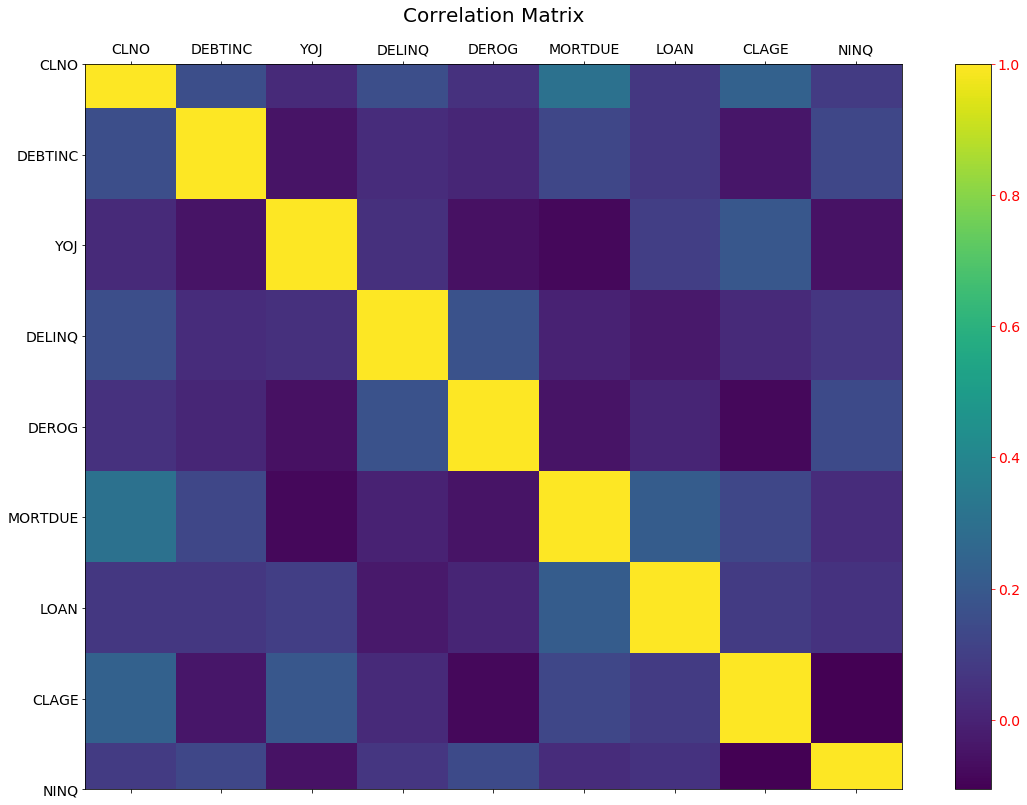

In [40]:
# Plotting the corelation matrix


f = plt.figure(figsize=(19, 13))
plt.matshow(subset.corr(),fignum=f.number)
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=14 )
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=14 )
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14, colors="red")
plt.title('Correlation Matrix', fontsize=20);


**ATTRIBUTE RELVANCE ANALYSIS** 

***Calculating WOE and IV***

In [19]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [20]:
for col in df.columns:
    if col == 'BAD': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        dset, iv = calculate_woe_iv(df, col, 'BAD')
        print(dset)
        print('IV score: {:.2f}'.format(iv))
        print('\n')


WoE and IV for column: LOAN


C:\Users\velth\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
9     2400    6     1    5    0.000210   0.004209 -2.999723  0.011996
5     2000    6     1    5    0.000210   0.004209 -2.999723  0.011996
392  42000    5     1    4    0.000210   0.003367 -2.776579  0.008767
13    3000   12     3    9    0.000629   0.007576 -2.488897  0.017290
442  50000   16     5   11    0.001048   0.009259 -2.178742  0.017890
..     ...  ...   ...  ...         ...        ...       ...       ...
197  21500   23    22    1    0.004611   0.000842  1.700758  0.006411
158  17600   24    23    1    0.004821   0.000842  1.745210  0.006944
80    9800   26    25    1    0.005240   0.000842  1.828591  0.008043
109  12700   27    26    1    0.005450   0.000842  1.867812  0.008607
76    9400   28    27    1    0.005659   0.000842  1.905552  0.009180

[540 rows x 8 columns]
IV score: 0.71


WoE and IV for column: MORTDUE
         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
20     50000.0

     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
176     41    4     1    3    0.000210   0.002525 -2.488897  0.005763
327     11    3     1    2    0.000210   0.001684 -2.083432  0.003071
34       9    6     2    4    0.000419   0.003367 -2.083432  0.006142
342     34    3     1    2    0.000210   0.001684 -2.083432  0.003071
289     39    3     1    2    0.000210   0.001684 -2.083432  0.003071
..     ...  ...   ...  ...         ...        ...       ...       ...
234    243   22    21    1    0.004402   0.000842  1.654238  0.005889
96     193   23    22    1    0.004611   0.000842  1.700758  0.006411
38     211   24    23    1    0.004821   0.000842  1.745210  0.006944
301    244   24    23    1    0.004821   0.000842  1.745210  0.006944
131    175   29    28    1    0.005869   0.000842  1.941920  0.009762

[417 rows x 8 columns]
IV score: 0.39


WoE and IV for column: NINQ
    Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
8     9.0    11     5

The good predictor cut off value for the IV score is 0.10 or more.
The attribute REASON has an IV score: 0.01 and hence it is taken removed from the data.

In [21]:
df1=pd.DataFrame()
df1= df.drop(['REASON'], axis=1)
df1.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,Other,10,0.0,0.0,94,1.0,9,33.779915
1,1,1300,70053.0000,68400.000000,Other,7,0.0,2.0,121,0.0,14,33.779915
2,1,1500,13500.0000,16700.000000,Other,4,0.0,0.0,149,1.0,10,33.779915
3,1,1500,73760.8172,101776.048741,Other,8,0.0,0.0,179,0.0,21,33.779915
4,0,1700,97800.0000,112000.000000,Office,3,0.0,0.0,93,0.0,14,33.779915


Calculating Variance Inflation Factor to detect Multicollinearity

In [22]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:

#gathering the  features

features = "+".join(subset.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('BAD ~' + features, df1, return_type='dataframe')

In [24]:
# For each X, calculate VIF and save in dataframe

vif=pd.DataFrame()

vif["Variance_inflation_factor"]= [variance_inflation_factor(X.values,i) for  i in range(X.shape[1]) ]

vif["features"] = X.columns

vif.round(1)


,Variance_inflation_factor,features
0,29.5,Intercept
1,1.2,CLNO
2,1.1,DEBTINC
3,1.1,YOJ
4,1.1,DELINQ
5,1.1,DEROG
6,1.2,MORTDUE
7,1.1,LOAN
8,1.1,CLAGE
9,1.1,NINQ


   As per the above VIF value ,all these variables have value less than threshold value of 5.
   Hence MultiColinearity is NOT present and we are not dropping any variables from data.

In [25]:
print("Indentifed as BAD LOAN : " ,len(df1[df1['BAD'] == 1]))

print("Indentifed as GOOD LOAN : " ,len(df1[df1['BAD'] == 0]))

Indentifed as BAD LOAN :  1188
Indentifed as GOOD LOAN :  4771


There is no Class imbalance as per the ratio above, hence undersampling is not required in this case.

**Splitting the dataset into training and test**

In [26]:
from sklearn.model_selection import train_test_split

y = df1.BAD
X = df1.drop(['BAD'], axis=1)

X=pd.get_dummies(X) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4171, 16) (1788, 16) (4171,) (1788,)


**MODEL BUILDING**

LOGISTIC REGRESSION


In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


def run_regression_accuracy(X_train, y_train, X_test, y_test):
    logreg=LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred= logreg.predict(X_test)

    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

    cm = confusion_matrix(y_test, y_pred)

    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
  
    return logreg


C:\Users\velth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.78

Confusion matrix: 
 [[1388    4]
 [ 391    5]]

Classification report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1392
           1       0.56      0.01      0.02       396

    accuracy                           0.78      1788
   macro avg       0.67      0.50      0.45      1788
weighted avg       0.73      0.78      0.69      1788



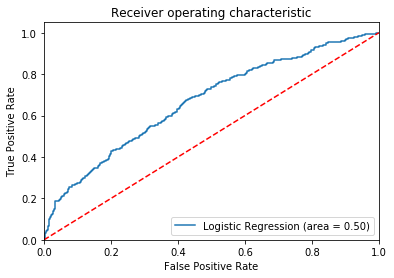

In [28]:
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

RANDOM FOREST

In [29]:
from sklearn.ensemble  import RandomForestClassifier 

# Creating the model with 100 trees

ranfor = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data

ranfor.fit(X_train, y_train)

y_pred= ranfor.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(ranfor.score(X_test, y_test)))


Accuracy of Random Forest classifier on test set: 0.91



Confusion matrix: 
 [[1353   39]
 [ 129  267]]

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1392
           1       0.87      0.67      0.76       396

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



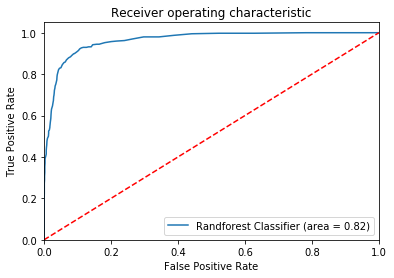

In [30]:
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_test, y_pred))

ranfor_roc_auc = roc_auc_score(y_test, ranfor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ranfor.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Randforest Classifier (area = %0.2f)' % ranfor_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Ranfor_ROC')
plt.show()

DECISION TREE

In [31]:
from sklearn.tree import DecisionTreeClassifier as dt


clf= dt()

clf.fit(X_train,y_train)
train_predictions=clf.predict(X_train)
test_predictions=clf.predict(X_test)


print("The Training F1 score is :", f1_score(train_predictions,y_train))
print("The Test F1 score is :" ,f1_score(test_predictions,y_test))


The Training F1 score is : 1.0
The Test F1 score is : 0.6521145975443383


The Decision Tree is NOT a right choice since the F1 score is 1 for the training data and it is overfitting.

GRADIENT BOOSTING METHOD

In [32]:
#Installing XGboost

conda install -y pip
pip install --upgrade virtualenv
pip install xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [34]:
import xgboost as xgb

from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV   

In [36]:
XGB =  XGBClassifier()

# Fit on training data

XGB.fit(X_train, y_train)

y_pred= XGB.predict(X_test)

print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(XGB.score(X_test, y_test)))

Accuracy of XG Boost classifier on test set: 0.89



Confusion matrix: 
 [[1351   41]
 [ 159  237]]

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1392
           1       0.85      0.60      0.70       396

    accuracy                           0.89      1788
   macro avg       0.87      0.78      0.82      1788
weighted avg       0.89      0.89      0.88      1788



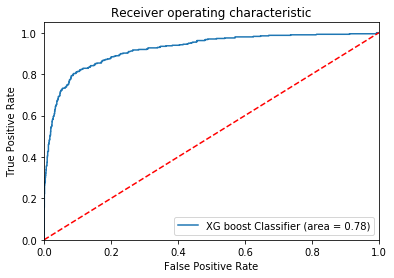

In [38]:
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_test, y_pred))

xgb_roc_auc = roc_auc_score(y_test, XGB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, XGB.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='XG boost Classifier (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Ranfor_ROC')
plt.show()

After comparing all the AUC scores from 4 different models, the **Random Forest Classifier** comes out as the best model with an AUC score of 0.82 . 

**Hyperparameter Tuning**

In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score

In [42]:
score=cross_val_score(ranfor,X_train,y_train,cv=5,scoring='roc_auc')
print(score.mean())

0.9617393033894661


In [43]:
print(ranfor)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
from sklearn.metrics import make_scorer

parameters={'max_depth':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[2,3,4,5],
    'criterion':['gini','entropy']
     }

#scorer=make_scorer(f1_Score)

In [49]:
# GRID SEARCH

Grid_search_obj=GridSearchCV(ranfor,parameters,cv = 3, n_jobs = -1, verbose = 2)

fit_obj= Grid_search_obj.fit(X,y)

best_clf= fit_obj.best_estimator_

Grid_score=cross_val_score(best_clf,X_train,y_train,cv=5,scoring='roc_auc')
print(Grid_score.mean())


#Fitting the new classifier

best_clf.fit(X_train,y_train)
train_predictions_grid=ranfor.predict(X_train)
test_predictions_grid=ranfor.predict(X_test)


#print("The Training score is :", f1_score(train_predictions_grid,y_train))
#print("The Test  score is :" ,f1_score(test_predictions_grid,y_test))




Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.2min finished


0.824752084855491


In [90]:
# RANDOMIZED SEARCH

rand_search_obj=RandomizedSearchCV(clf,parameters,scoring=scorer)

fit_obj= rand_search_obj.fit(X,y)

best_clf_rand= fit_obj.best_estimator_

rand_score=cross_val_score(best_clf_rand,X_train,y_train,cv=5,scoring='f1_macro')
print(rand_score.mean())


#Fitting the new classifier

best_clf_rand.fit(X_train,y_train)
train_predictions_rand=clf.predict(X_train)
test_predictions_rand=clf.predict(X_test)


print("The Training F1 score is :", f1_score(train_predictions_rand,y_train))
print("The Test F1 score is :" ,f1_score(test_predictions_rand,y_test))




C:\Users\velth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\velth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7434927038126261
The Training F1 score is : 1.0
The Test F1 score is : 0.6666666666666666


Even after the Hyperparameter tuning , the F1 score for training  is still 1 and is overfitting. 